# Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the data

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.shape

(14999, 10)

In [4]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

# Data cleaning, data wrangling, data preprocessing

## Missing value Treatment

In [5]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

- No missing values in the data.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
data = data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary','left']]
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


<Axes: >

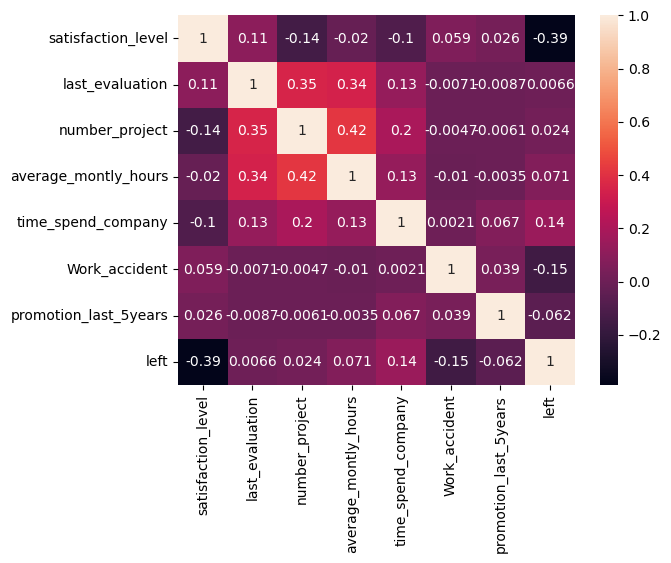

In [8]:
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='sales', ylabel='count'>

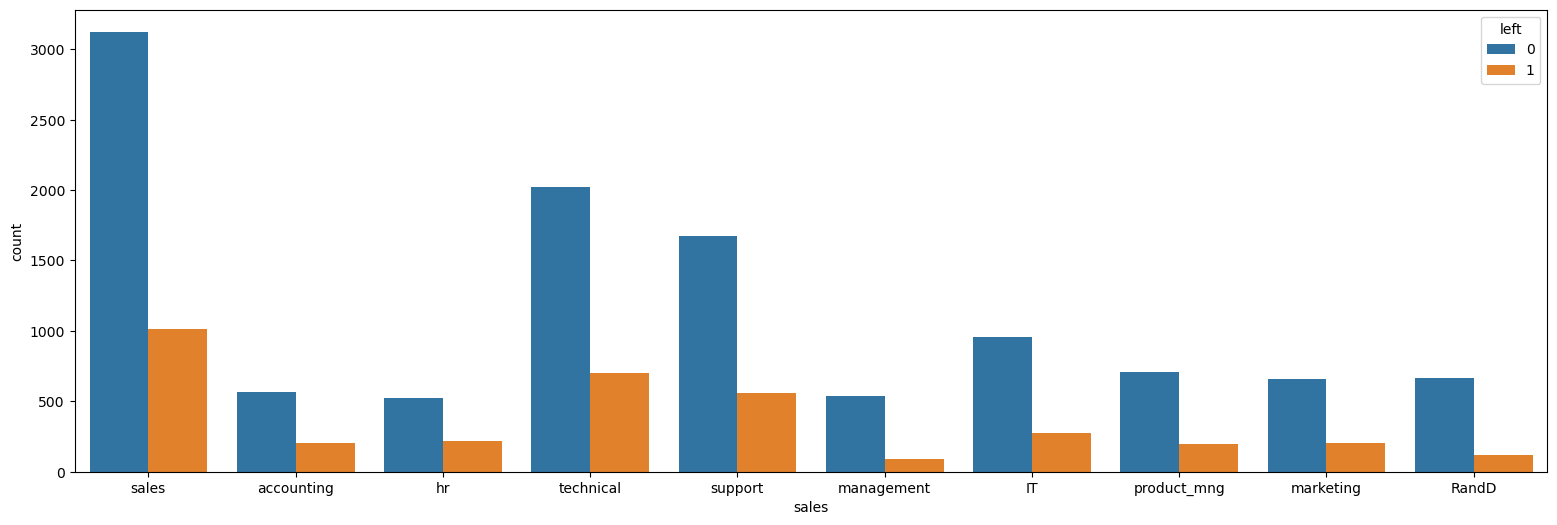

In [9]:
plt.figure(figsize=(19,6))
sns.countplot(x=data['sales'],hue = data['left'])

<Axes: xlabel='salary', ylabel='count'>

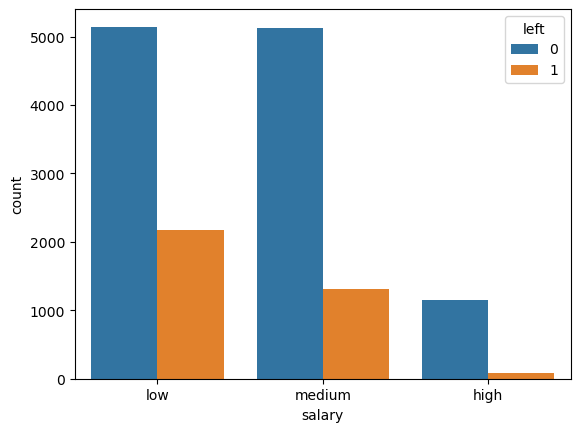

In [10]:
sns.countplot(x=data['salary'],hue = data['left'])

<Axes: xlabel='sales', ylabel='satisfaction_level'>

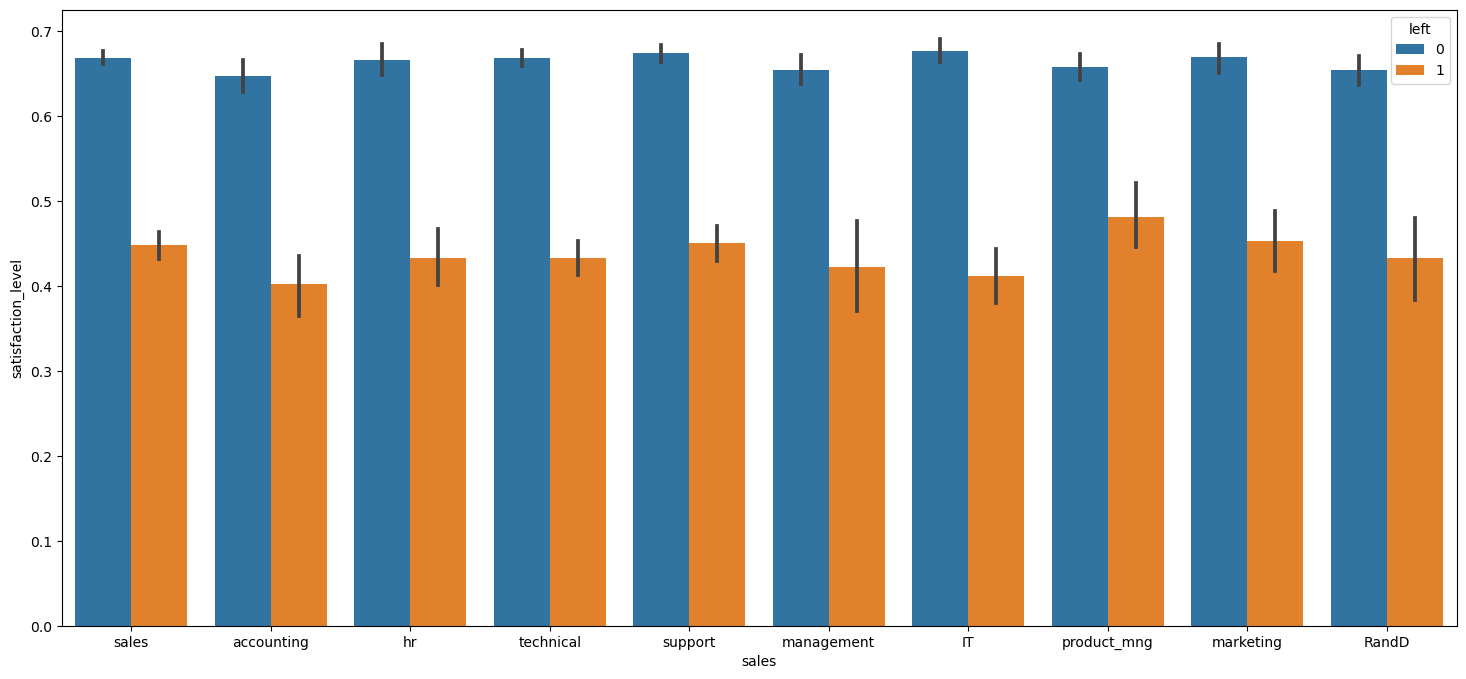

In [11]:
plt.figure(figsize=(18,8))
sns.barplot(x=data['sales'],y=data['satisfaction_level'],hue=data['left'])

<Axes: xlabel='left', ylabel='count'>

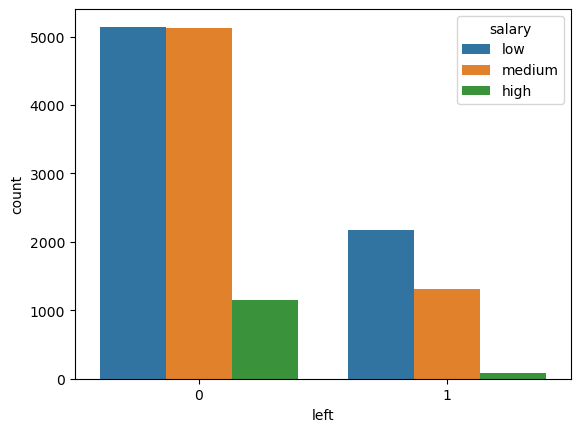

In [12]:
sns.countplot(x=data['left'],hue=data['salary'])

<Axes: xlabel='left', ylabel='count'>

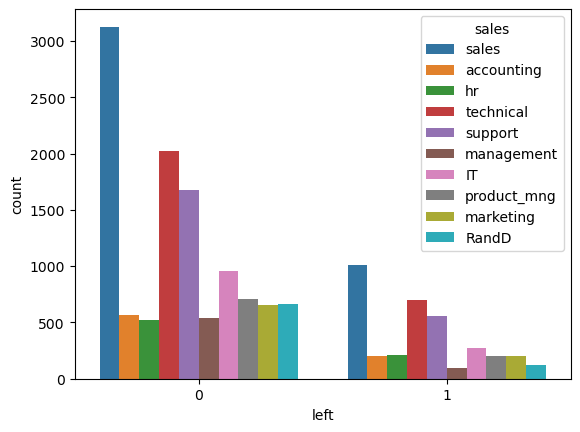

In [13]:
sns.countplot(x=data['left'],hue=data['sales'])

<Axes: xlabel='average_montly_hours', ylabel='satisfaction_level'>

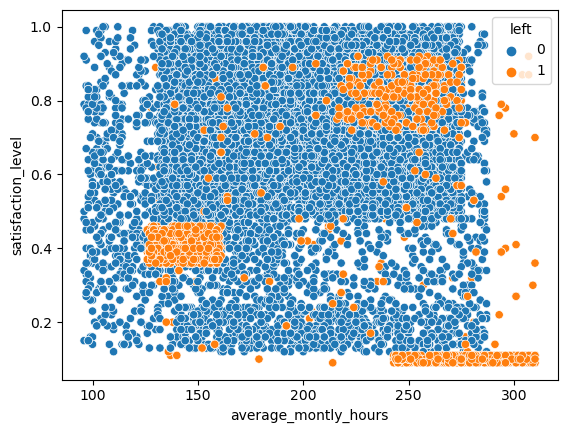

In [14]:
sns.scatterplot(x=data['average_montly_hours'],y=data['satisfaction_level'],hue=data['left'])

<Axes: xlabel='time_spend_company', ylabel='satisfaction_level'>

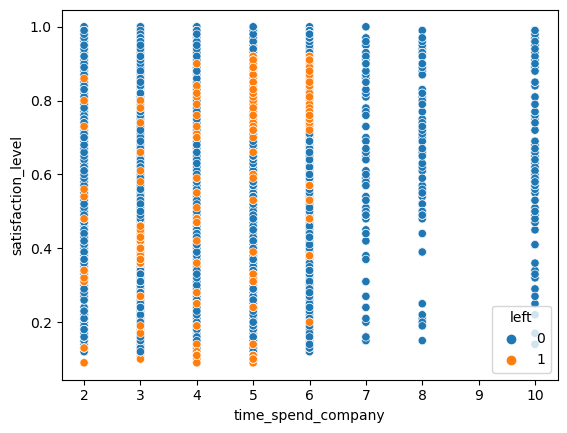

In [15]:
sns.scatterplot(x=data['time_spend_company'],y=data['satisfaction_level'],hue=data['left'])

## Feature scaling

In [16]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss

StandardScaler()

In [18]:
data[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]= ss.fit_transform(data[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']])
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,0,0,sales,low,1
1,0.752814,0.840707,0.971113,1.220423,1.713436,0,0,sales,medium,1
2,-2.022479,0.957554,2.593763,1.420657,0.343655,0,0,sales,medium,1
3,0.431041,0.899131,0.971113,0.439508,1.028546,0,0,sales,low,1
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,0,0,sales,low,1


In [19]:
data['promotion_last_5years'].unique()

array([0, 1], dtype=int64)

In [20]:
data['Work_accident'].unique()

array([0, 1], dtype=int64)

## feature encoding

In [21]:
dic = {'low':0, 'medium':1, 'high':2}
data['salary'] = data['salary'].replace(dic)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,0,0,sales,0,1
1,0.752814,0.840707,0.971113,1.220423,1.713436,0,0,sales,1,1
2,-2.022479,0.957554,2.593763,1.420657,0.343655,0,0,sales,1,1
3,0.431041,0.899131,0.971113,0.439508,1.028546,0,0,sales,0,1
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,0,0,sales,0,1


In [22]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,0,0,sales,0,1
1,0.752814,0.840707,0.971113,1.220423,1.713436,0,0,sales,1,1
2,-2.022479,0.957554,2.593763,1.420657,0.343655,0,0,sales,1,1
3,0.431041,0.899131,0.971113,0.439508,1.028546,0,0,sales,0,1
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,0,0,sales,0,1


In [23]:
data = data.rename({'sales':'Sales'},axis=1)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Sales,salary,left
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,0,0,sales,0,1
1,0.752814,0.840707,0.971113,1.220423,1.713436,0,0,sales,1,1
2,-2.022479,0.957554,2.593763,1.420657,0.343655,0,0,sales,1,1
3,0.431041,0.899131,0.971113,0.439508,1.028546,0,0,sales,0,1
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,0,0,sales,0,1


In [24]:
data_ohe = pd.get_dummies(data['Sales'])
data_ohe.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [25]:
data = pd.concat([data,data_ohe],axis=1)
data = data.drop('Sales',axis=1)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.752814,0.840707,0.971113,1.220423,1.713436,0,0,1,1,0,0,0,0,0,0,0,1,0,0
2,-2.022479,0.957554,2.593763,1.420657,0.343655,0,0,1,1,0,0,0,0,0,0,0,1,0,0
3,0.431041,0.899131,0.971113,0.439508,1.028546,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,0,0,0,1,0,0,0,0,0,0,0,1,0,0


# separate the data into x and y

In [26]:
x= data.drop('left',axis=1)
y = data['left']

# split the data

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

# Apply logistic Regression on the train set

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [29]:
lr.fit(x_train,y_train)

LogisticRegression()

# Perform Prediction on the test set

In [30]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# evaluations

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7912

We are getting an accuracy of 79.12% using logistic regression on the above data.